TLDR: Jump to
- [Main implementation](#Main-implementation)
- [`skimage` implementations](#skimage-implementation)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from skimage.filters import gaussian
import pixel_expand

ModuleNotFoundError: No module named 'skimage'

### Generate a simple pixel circle

The function `pixel_expand.generate_pixel_circle(radius)`, generates a simple pixel circle given a radius.

It returns a matrix (2x2 np array), that would work as a reference in order to expand the pixel.

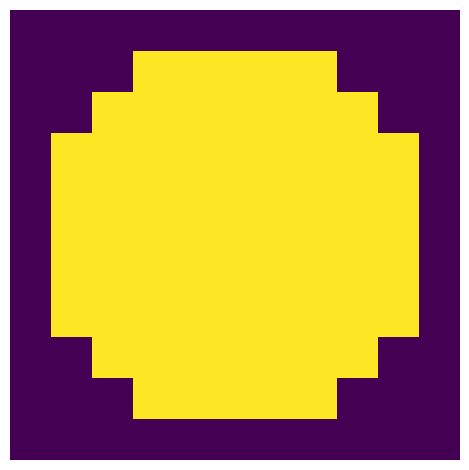

In [ ]:
pixel_circle = pixel_expand.generate_pixel_circle(5)
pixel_expand.plot_matrix(pixel_circle)

### Generate landmarks

Following cell simply creates 5 different matrices with a single pixel turned on. 4 of the matrices have a pixel turned on each corner of the matrix, and the 5th one on the center.

This is just to simulate the landmarks and later showcase the use of the pixel expansion.

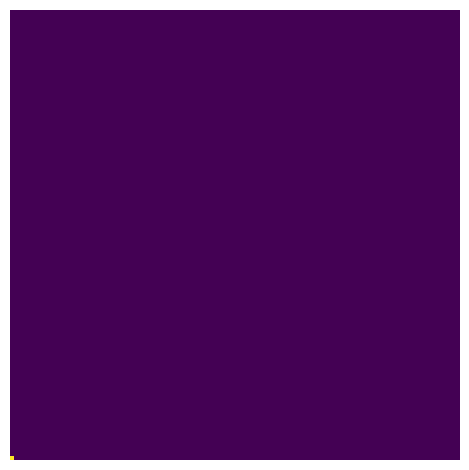

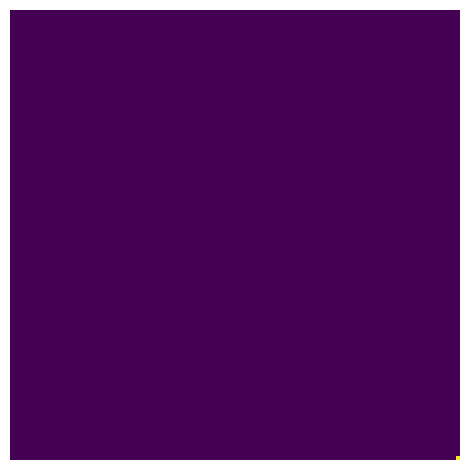

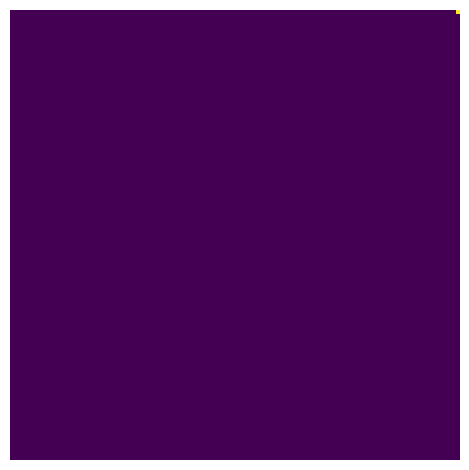

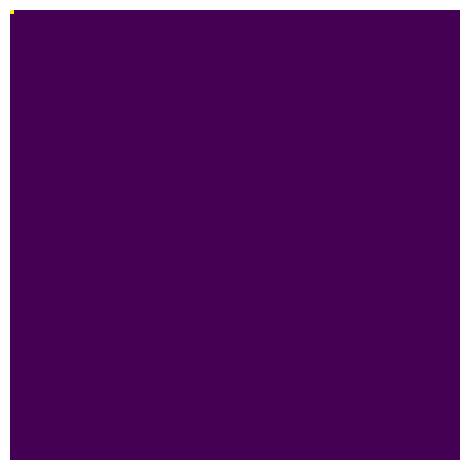

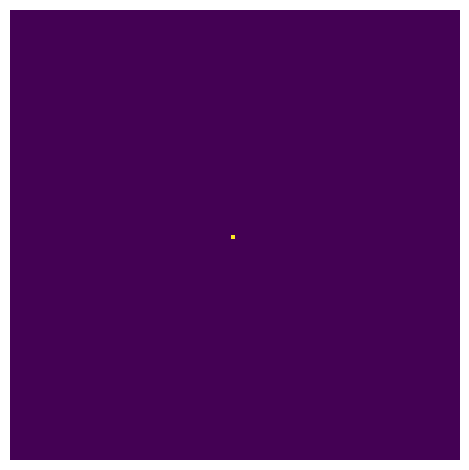

In [ ]:
base_zeros_matrix = np.zeros((112, 112))

channels = []
channel_points = [(0, 0), (0, 111), (111, 111), (111, 0), (55, 55)]

for point in channel_points:
    x, y = point
    new_channel = deepcopy(base_zeros_matrix)
    new_channel[x][y] = 1
    pixel_expand.plot_matrix(new_channel)

    channels.append(new_channel)

channels = np.array(channels) # convert initial list into a numpy array
og_channels = deepcopy(channels) # store a copy for later

### Expanding algorithm

Takes in a `matrix` that is expected to only have one single pixel turned on, therefore it also takes and `x` and `y` values of its position.

It also takes in the desired expansion value as an integer.

The process is to generate a simple matrix of zeros with a pixelated circle of ones built from the center of the desired radius, this matrix is known as a `kernel`.

It then aligns said `kernel` to the only turned on pixel from the original matrix. Once it aligns it it goes through the kernel and makes an OR bitwise operation to merge both matrices.

## Main implementation

In the following I use a list of matrixes (`channels`). This matrices are each image channel with a single pixel turned on on each.

There is also a list of tuples (`channel_points`), representing points that belong to the `x` and `y` coordinates of the turned on pixel on each matrix.

It is crutial that the index of a certain matrix on `channels`, matches with its corresponding pixel on `channel_points`


### Direct implementation

In [ ]:
expand_radius = 5

new_channels = []
for chan, points in zip(channels, channel_points):
    new_channels.append(pixel_expand.expand_pixel(chan, points[0], points[1], expand_radius))

### Just plotting

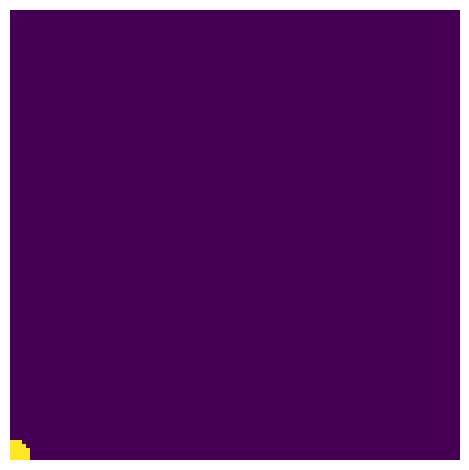

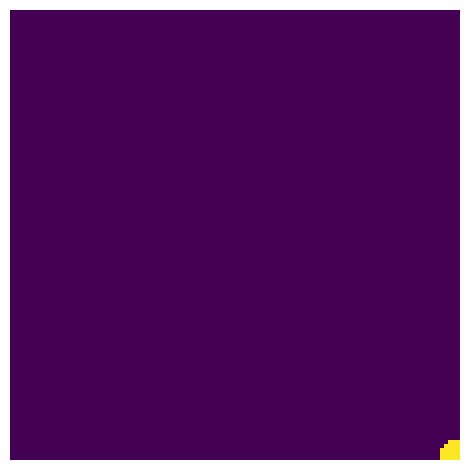

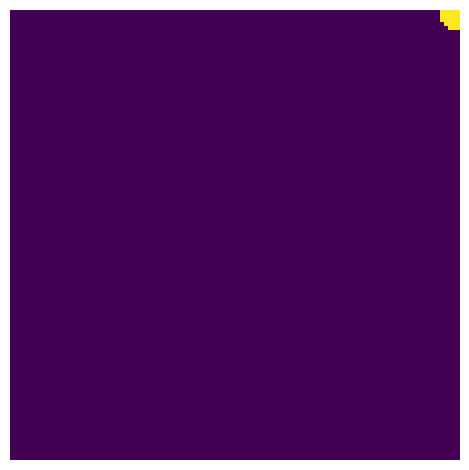

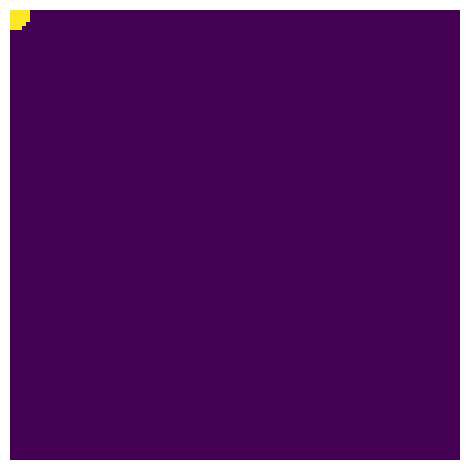

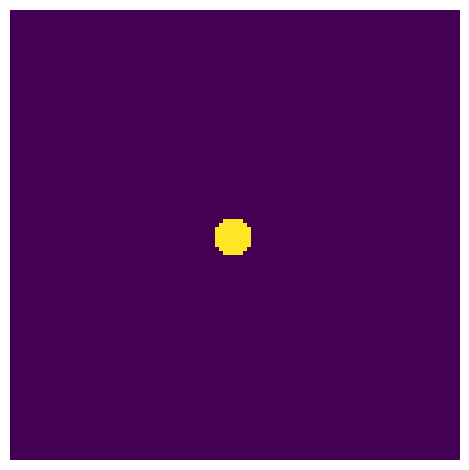

In [ ]:
for chan in new_channels:
    pixel_expand.plot_matrix(chan)

## `skimage` implementation

It is possible to use `skimage.filters.gaussian` to make a circle of pixels around the original one, with different strengths following a gaussian distribution from the center.

The resulting circle radius can be denoted by the variance of said gaussian distribution devided by 2.

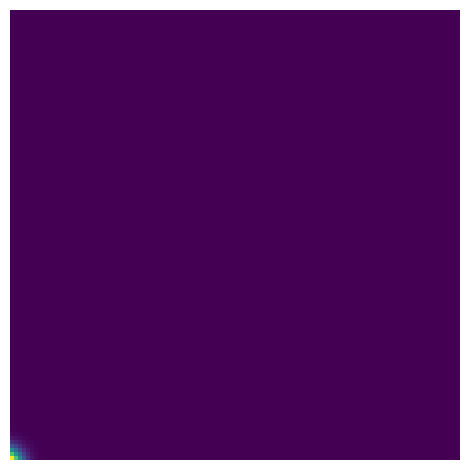

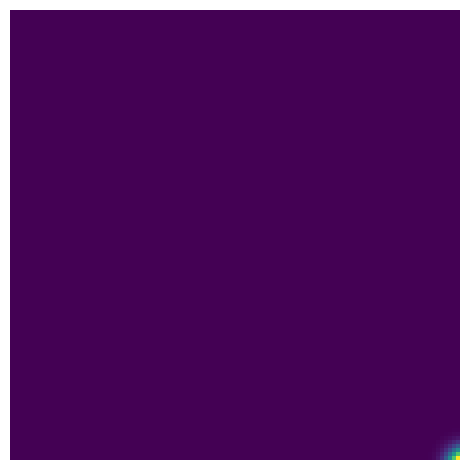

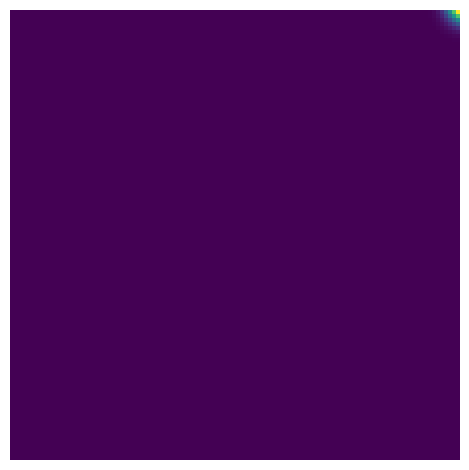

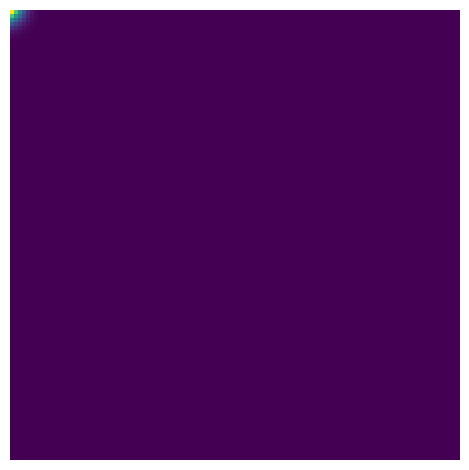

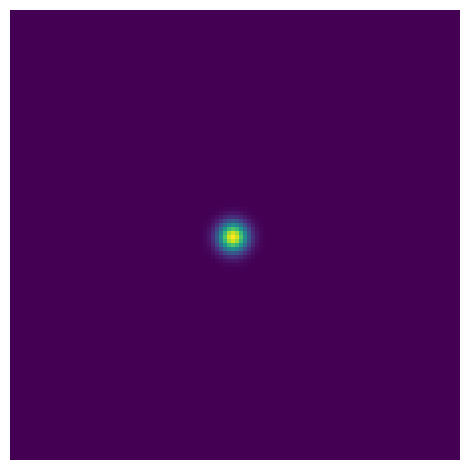

In [ ]:
variance = expand_radius / 2

gauss_heatmaps = gaussian(og_channels, sigma=[0, variance, variance])
for chan in gauss_heatmaps:
    pixel_expand.plot_matrix(chan)

plt.show()

#### Comparison with implementation of just expanding

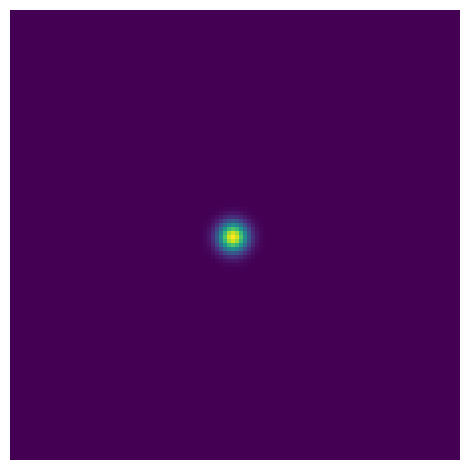

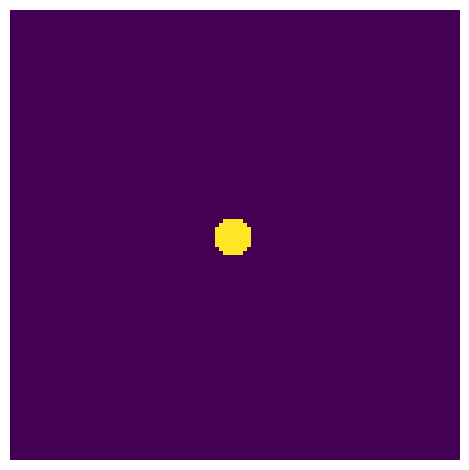

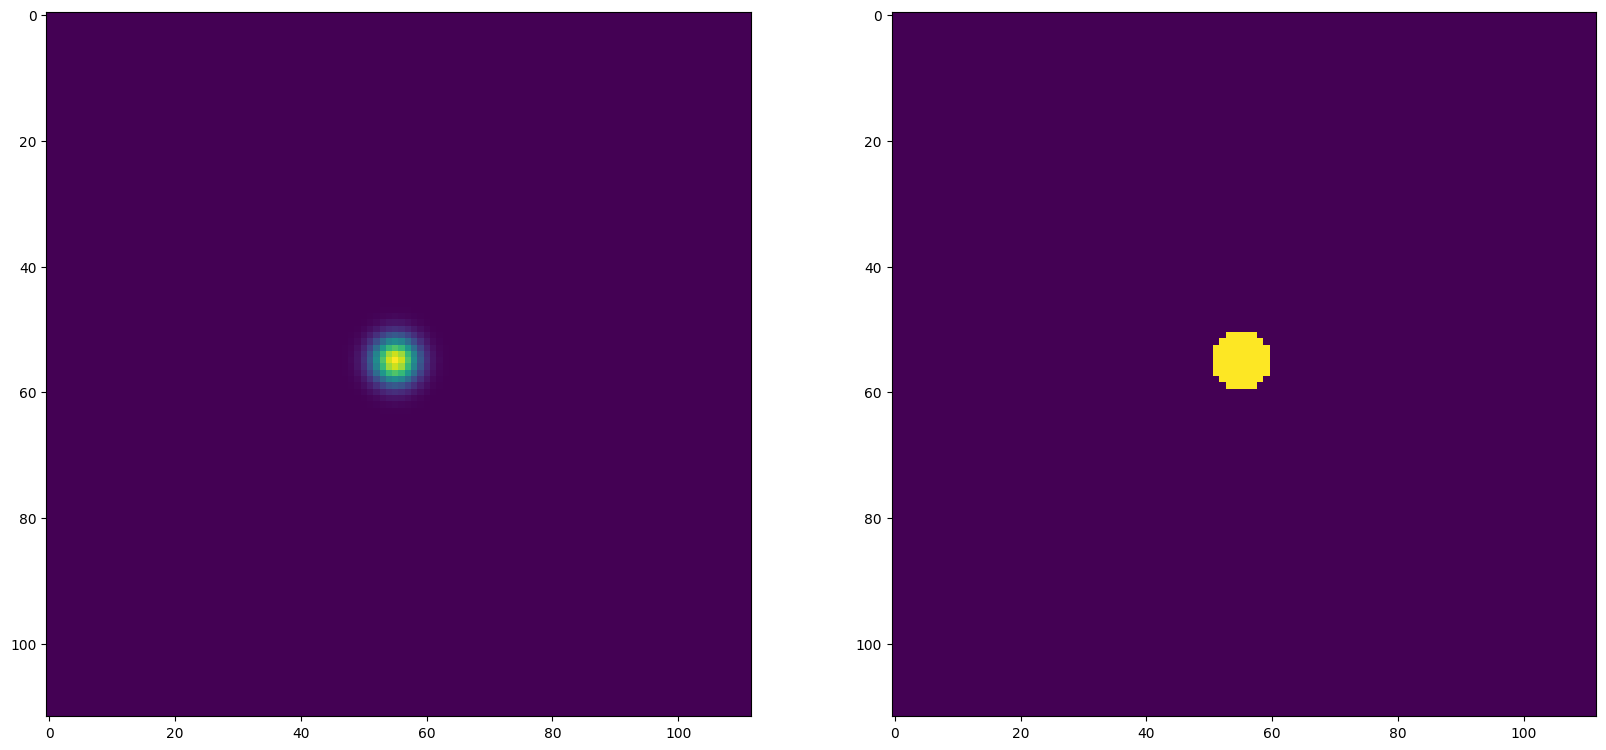

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(gauss_heatmaps[-1])
plt.subplot(1, 2, 2)
plt.imshow(new_channels[-1])
plt.show()